# Checkpoints Part 1

## Spark funds -  Asset Management Company

<b> Objective </b> - CEO of our company wants to invest money in few companies. Her investments will be guided by global trend in the investments (on where do most of the investors are investing)

<b> Constraints </b>-

<ul>
    <li> Wants to do investment in the range of 5 to 15 USM million dollars </li>
    <li> Wants to do investment in only English speaking countries </li>
</ul>

<b> Buisness Objective </b>-

To invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

<b> Data analusis Objectives </b> -

<ul>
    <li> To understand which Investment types are attracting the most of the investments. </li>
    <li> To understand which are the countries attracting most of the investments.  </li>
    <li> To understand which are the Main sectors (8 main) attracting most of the investments.  </li>
</ul>


# Checkpoint 1: Data Cleaning 1

In [1]:
# import all libraries for this stage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup as soup
import re

In [2]:
companies = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\companies.csv", encoding='palmos')
rounds2 = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\rounds2.csv", encoding='palmos')
mapping = pd.read_csv(r"C:\Users\abc\Downloads\AI-ML\git\assignments\First Assignment\csv\mapping.csv", encoding='palmos')

#### Analysis of companies dataframe

In [3]:
# analyse companies
companies.head(1)

permalink   name        homepage_url category_list     status  \
0  /Organization/-Fame  #fame  http://livfame.com         Media  operating   

  country_code state_code  region    city founded_at  
0          IND         16  Mumbai  Mumbai        NaN

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
companies.shape

(66368, 10)

As permalink has organization as default part let's see whether it's present in all the rows or not and have uniform spelling

#### We have found that there is inconsistency in cases for companies and rouds2 data frame so let's convert all the values into lowercase.

In [6]:
companies.permalink = companies.permalink.apply(lambda x : str.lower(x))

In [7]:
companies.permalink.str.contains('organization').shape

(66368,)

Hence we can say that there is no problem with organization

In [8]:
companies[companies.category_list.apply(lambda x : bool(re.search(r'\d', str(x))))].category_list.value_counts() #no issues

3D Printing                                                                                                               18
Education|K-12 Education                                                                                                   6
B2B                                                                                                                        6
P2P Money Transfer                                                                                                         5
M2M|Software                                                                                                               4
                                                                                                                          ..
B2B|Mobile|SaaS|Small and Medium Businesses|Software                                                                       1
3D Printing|Industrial Automation|New Product Development|Open Source                                                      1


#### Analysis of rounds2 dataframe

In [9]:
# analyse rounds2
rounds2.head(1)

company_permalink                          funding_round_permalink  \
0  /organization/-fame  /funding-round/9a01d05418af9f794eebff7ace91f638   

  funding_round_type funding_round_code   funded_at  raised_amount_usd  
0            venture                  B  05-01-2015         10000000.0

In [10]:
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : str.lower(x))

In [11]:
rounds2.shape

(114949, 6)

In [12]:
rounds2.company_permalink.str.contains('organization').shape #No issues

(114949,)

#### Analysis for mapping dataframe

In [13]:
mapping.head(1)

category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
0           NaN                    0       1                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
0              0       0              0                           0       0   

   Social, Finance, Analytics, Advertising  
0                                        0

In [14]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [15]:
mapping.shape

(688, 10)

In [16]:
#remove NaN row as we will delete all the category list rows which will have null values

In [17]:
mapping.category_list.apply(lambda x : type(x))

0      <class 'float'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
            ...       
683      <class 'str'>
684      <class 'str'>
685      <class 'str'>
686      <class 'str'>
687      <class 'str'>
Name: category_list, Length: 688, dtype: object

In [18]:
mapping = mapping[~(mapping.category_list.apply(lambda x : isinstance(x, float)))]

In [19]:
mapping[mapping.category_list.apply(lambda x : bool(re.search(r'\d', x)))]

category_list  Automotive & Sports  Blanks  \
1                        3D                    0       0   
2               3D Printing                    0       0   
3             3D Technology                    0       0   
20      Alter0tive Medicine                    0       0   
22                 A0lytics                    0       0   
..                      ...                  ...     ...   
612  Social Media Ma0gement                    0       0   
633  Supply Chain Ma0gement                    0       0   
637          Task Ma0gement                    0       0   
664               Veteri0ry                    0       0   
672         Waste Ma0gement                    0       0   

     Cleantech / Semiconductors  Entertainment  Health  Manufacturing  \
1                             0              0       0              1   
2                             0              0       0              1   
3                             0              0       0              1   
20                            0              0       1              0   
22                            0              0       0              0   
..                          ...            ...     ...            ...   
612                           0              0       0              0   
633                           0              0       0              0   
637                           0              0       0              0   
664                           0              0       1              0   
672                           1              0       0              0   

     News, Search and Messaging  Others  \
1                             0       0   
2                             0       0   
3                             0       0   
20                            0       0   
22                            0       0   
..                          ...     ...   
612                           0       0   
633                           0       1   
637                           0       1   
664                           0       0   
672                           0       0   

     Social, Finance, Analytics, Advertising  
1                                          0  
2                                          0  
3                                          0  
20                                         0  
22                                         1  
..                                       ...  
612                                        1  
633                                        0  
637                                        0  
664                                        0  
672                                        0  

[61 rows x 10 columns]

There is pattern from which we can conclude that 0 should be replaced with 'na'

In [20]:
mapping.category_list = mapping.category_list.apply(lambda x : x.replace('0','na'))

In [21]:
mapping[mapping.category_list.apply(lambda x : bool(re.search(r'\d', x)))]

category_list  Automotive & Sports  Blanks  \
1                      3D                    0       0   
2             3D Printing                    0       0   
3           3D Technology                    0       0   
48                    B2B                    0       0   
49   B2B Express Delivery                    0       0   
243       Enterprise 2.na                    0       0   
392        K-12 Education                    0       0   
423                   M2M                    0       0   
507    P2P Money Transfer                    0       0   

     Cleantech / Semiconductors  Entertainment  Health  Manufacturing  \
1                             0              0       0              1   
2                             0              0       0              1   
3                             0              0       0              1   
48                            0              0       0              0   
49                            0              0       0              0   
243                           0              0       0              0   
392                           0              0       0              0   
423                           0              0       0              0   
507                           0              0       0              0   

     News, Search and Messaging  Others  \
1                             0       0   
2                             0       0   
3                             0       0   
48                            0       0   
49                            0       0   
243                           0       1   
392                           0       1   
423                           0       1   
507                           0       0   

     Social, Finance, Analytics, Advertising  
1                                          0  
2                                          0  
3                                          0  
48                                         1  
49                                         1  
243                                        0  
392                                        0  
423                                        0  
507                                        1

One more issue with 2.na replace that value

In [22]:
mapping.category_list = mapping.category_list.apply(lambda x : x.replace('2.na',''))

## No of unique companies in companies

In [23]:
companies.permalink.nunique()

66368

## No of unique companies in rounds2

In [24]:
rounds2.company_permalink.nunique()

66368

### Let's see which colums are contenstant for to be unique, broadly there are two <font color ='red'> name </font>  and <font color ='red'> permalink</font> 
Now let's see whether this columns contain any duplicate data or not

In [25]:
companies[companies.permalink.duplicated()]

Empty DataFrame
Columns: [permalink, name, homepage_url, category_list, status, country_code, state_code, region, city, founded_at]
Index: []

In [26]:
companies.name[companies.name.duplicated()]

282         3DIVAZ
1527        Adtena
1996         Agora
3006        Amicus
3091     Amplitude
           ...    
64571       Wunder
64572       Wunder
65799        Gusto
65899        Zesty
66029      ZingBox
Name: name, Length: 268, dtype: object

In [27]:
companies[companies.name.duplicated()].head(5)

permalink       name  \
282      /organization/3divaz-3     3DIVAZ   
1527     /organization/adtena-2     Adtena   
1996      /organization/agora-6      Agora   
3006    /organization/amicus-co     Amicus   
3091  /organization/amplitude-2  Amplitude   

                            homepage_url                 category_list  \
282            http://www.3divaz.ch/Home                           NaN   
1527                   http://adtena.com                           NaN   
1996                https://www.agora.co  Android|Apps|Internet|Mobile   
3006                http://www.amicus.co   Apps|Mobile|Mobile Commerce   
3091  http://amplitude-technologies.com/                   Electronics   

         status country_code state_code         region       city  founded_at  
282   operating          CHE          1    CHE - Other    Wildegg  01-07-2014  
1527     closed          NaN        NaN            NaN        NaN  15-11-2014  
1996  operating          USA         NY  New York City   New York  01-07-2013  
3006  operating          IND          7      New Delhi  New Delhi  01-01-2015  
3091  operating          FRA         A8       Ãƒâ€°vry      Ã‰vry  01-01-2001

As we can see from above data that <font color ='red'> name </font> column has duplicate data whereas <font color ='red'> permalink </font> has no duplicate data. And where name is duplicated there we have different permalink. So it's clear we that we have to take <b> permalink as our unique column. </b>

<b> Let's see whether there are any companies in the rounds2 file which are not  present in companies

In [28]:
list(set(rounds2.company_permalink)-set(companies.permalink))

[]

So there are no companies which are not present in companies file

# Merging the two dataframes

Before this let's rename company_permalink to permalink for better understanding

In [29]:
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})

### Merging two dataframes, using inner join as we common data only

In [30]:
master_frame = pd.merge(left=rounds2,right=companies,how='inner',on='permalink')
master_frame.count()

permalink                  114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

# Data cleaning

Let's try to find out which column has null or blank values.
Let's plot heat map of null values in each column

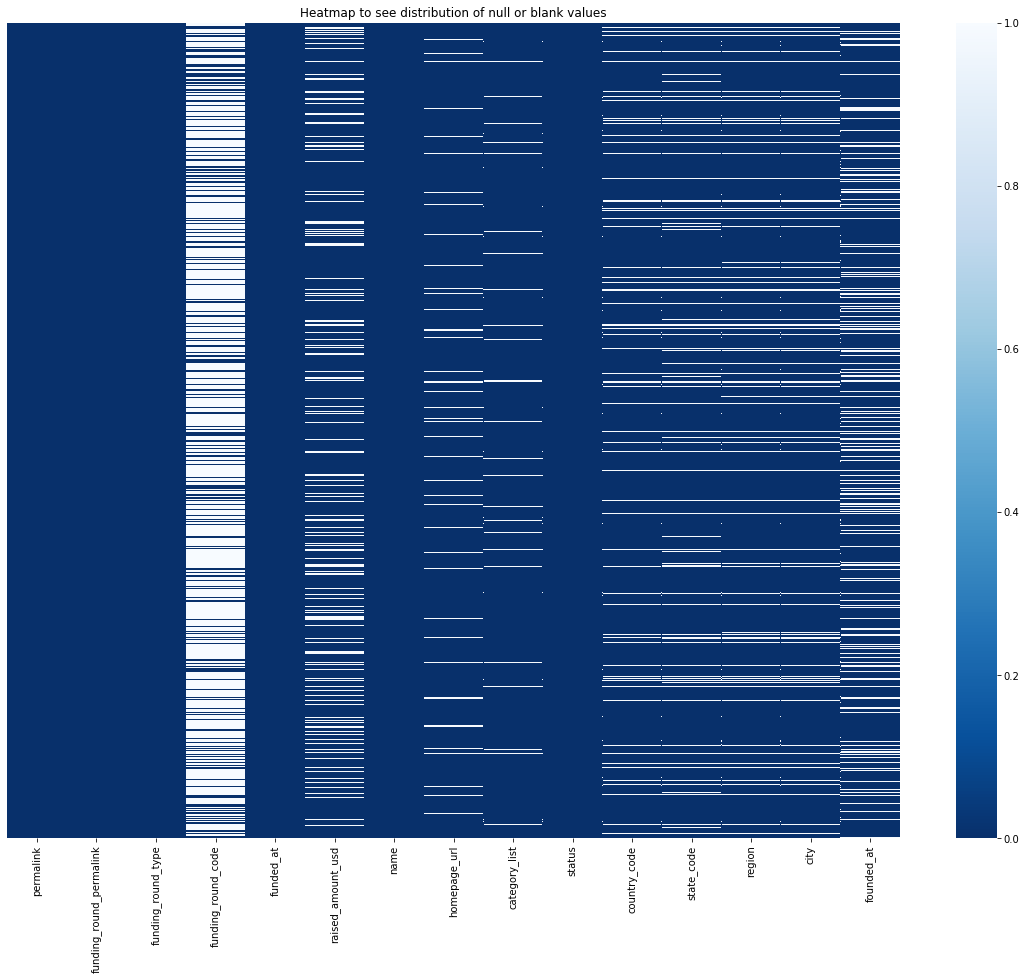

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(master_frame.isna(),cbar=True, yticklabels=False, cmap="Blues_r" )
plt.title("Heatmap to see distribution of null or blank values")
plt.show()

We can see from above heatmap that funding_round_code and founded_at fields have most of the null or blank values.
Now let's try to figure out which are the columns which are necessary for our analysis so that we can get rid of other columns.

<ul>
    <li>permalink - It's necessary as it contains unique id</li>
    <li>funding_round_permalink - Not necessary</li>
    <li>funding_round_type - Necessary</li>
    <li>funding_round_code - Not necessary</li>
    <li>funded_at - Not necessary</li>
    <li>raised_amount_usd - Necessary</li>
    <li>name - Necessary</li>
    <li>homepage_url - Not necessary</li>
    <li>category_list - Necessary</li>
    <li>status - not necessary</li>
    <li>country_code - necessary</li>
    <li>state_code - Not necessary</li>
    <li>region - Not necessary</li>
    <li>city - Not necessary</li>
    <li>founded_at -Not necessary</li>
</ul>

In [32]:
master_frame = master_frame[['permalink', 'funding_round_type', 'raised_amount_usd', 'name','category_list', 'country_code']]

Let's see now how many null values are present

### Only selecting those fund types in which company is interested (We can do this as funding_round_type has no blank or null values)

Before selecting let's see value counts to see whether naming is uniform or not

In [33]:
master_frame.funding_round_type.value_counts() #no issues

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [34]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed','private_equity','angel'])]

In [35]:
master_frame.isnull().sum()

permalink                 0
funding_round_type        0
raised_amount_usd     13770
name                      1
category_list          2497
country_code           7321
dtype: int64

Let's drop all the rows which doesn't have data for above columns.

In [36]:
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() | master_frame['country_code'].isnull() | master_frame['category_list'].isnull())]

Now as we dropped all null values , let's see how many null values still left

In [37]:
master_frame.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  1
category_list         0
country_code          0
dtype: int64

Giving name to the company whose name is missing

In [38]:
master_frame[master_frame.name.isnull()] #let's give a name to this company

permalink funding_round_type  raised_amount_usd name  \
98692  /organization/tell-it-in               seed            25000.0  NaN   

      category_list country_code  
98692      Startups          USA

In [39]:
master_frame.loc[master_frame[master_frame.name.isnull()].index.item(),'name'] = master_frame[master_frame.name.isnull()].permalink.item().split("/")[2]

In [40]:
master_frame.isnull().sum()

permalink             0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
dtype: int64

In [41]:
master_frame.reset_index(drop=True, inplace=True)

# Checkpoint 2: Funding Type Analysis

### Finding mean for each type of funding type

In [42]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values()

funding_round_type
seed              7.477937e+05
angel             9.715739e+05
venture           1.172422e+07
private_equity    7.393849e+07
Name: raised_amount_usd, dtype: float64

### As company wants to do investment in the range of 5M to 15M only venture is satisfying the condition

In [43]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().between(5000000,15000000, inclusive=True)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

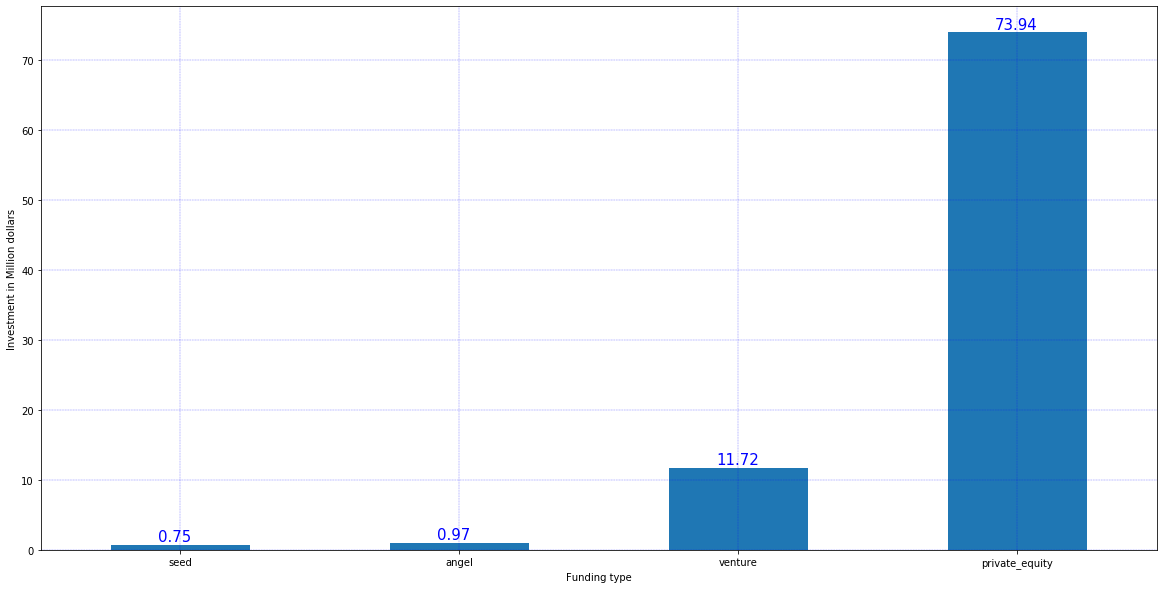

In [44]:
plt.figure(figsize=(20,10))
plt.ylabel("Investment in Million dollars")
master_frame["funding_amount_in_milion"] = master_frame.raised_amount_usd.apply(lambda x : x/1000000)
ax = master_frame.groupby('funding_round_type')['funding_amount_in_milion'].mean().sort_values().plot.bar()
ax.grid(color='b', ls = '-.', lw = 0.25)
plt.xticks(rotation=0)
plt.xlabel("Funding type")
for i in ax.patches:
    ax.text(i.get_x() + (i.get_width()/2-0.08) , i.get_height()+0.5, str(round((i.get_height()), 2)), fontsize=15, color='blue')

### So selecting only those rows which has funding type as venture

In [45]:
master_frame = master_frame[master_frame.funding_round_type == 'venture']

Let's drop funding_round_type as it's no longer required all values are for venture type.

In [46]:
master_frame.drop(['funding_round_type'],axis=1,inplace=True)

In [47]:
master_frame.head(5)

permalink  raised_amount_usd  \
0                  /organization/-fame         10000000.0   
2                /organization/0-6-com          2000000.0   
4  /organization/0ndine-biomedical-inc           719491.0   
6                 /organization/0xdata         20000000.0   
7                 /organization/0xdata          1700000.0   

                     name  category_list country_code  \
0                   #fame          Media          IND   
2                 0-6.com    Curated Web          CHN   
4  Ondine Biomedical Inc.  Biotechnology          CAN   
6                  H2O.ai      Analytics          USA   
7                  H2O.ai      Analytics          USA   

   funding_amount_in_milion  
0                 10.000000  
2                  2.000000  
4                  0.719491  
6                 20.000000  
7                  1.700000

# Checkpoints - Part 2

## Country Analysis

In [48]:
top9 = master_frame[master_frame.country_code.isin(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9].index)]

In [49]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

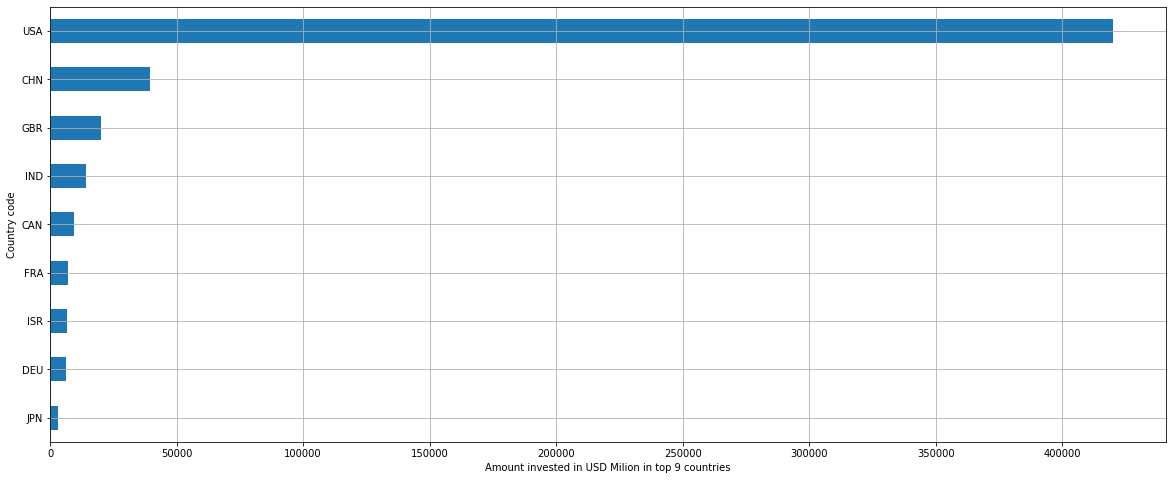

In [50]:
plt.figure(figsize=(20,8))
top9.groupby('country_code')['funding_amount_in_milion'].sum().sort_values().plot.barh(grid=True)
plt.xlabel("Amount invested in USD Milion in top 9 countries" )
plt.ylabel("Country code")
plt.show()

<b> Now we have to see which countries are English speaking countries for this we will use web scrapping technique to get data 
from wikipedia. </b>

In [51]:
from bs4 import BeautifulSoup 
def en_con_details():
    r = requests.get("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language") 
    soup = BeautifulSoup(r.text, 'lxml') # Parse the HTML as a string
    table = soup.find_all('table')
    
    headers = []
    tb = 0
    global  off_en_counts
    r = 1
    r_len = len(table[0].find_all('tr')) + len(table[1].find_all('tr'))
    while tb < 2:
        t = table[tb]
        tr_elements = t.find_all('tr')
        for i in range(0,len(tr_elements)):
            
            if i == 0 :
                r -= 1
                if tb == 0:
                    for j in tr_elements[i].find_all('th'):
                        headers.append(str.strip(j.text))
                    off_en_counts = pd.DataFrame([],columns=headers,index=range(0,r_len-2))
            elif i != 0:
                l = 0
                for k in tr_elements[i].find_all('td'):
                    off_en_counts.iloc[r-1,l] = str.strip(k.text)
                    l+=1
            r+=1
        tb+=1
    return off_en_counts

In [52]:
off_en_counts = en_con_details()  

Let's do data cleaning and remove unwanted columns

In [53]:
off_en_counts.drop(['Nr','Region','Population','Primary language?'], axis=1,inplace=True)
off_en_counts['Country'] = off_en_counts['Country'].apply(lambda x : x.split("[")[0])

Now let's merge the <b>off_en_counts </b> and <b> top9 </b>

In [54]:
off_en_counts = off_en_counts.rename(columns={'Alpha-3 code':'country_code'})

## Checkpoint 3: Country Analysis

In [55]:
en_inv = pd.merge(left=top9,right=off_en_counts,how='inner',on='country_code')

In [56]:
en_inv.reset_index(drop=True,inplace=True)

In [57]:
en_inv.Country.unique()

array(['India', 'Canada', 'United States', 'United Kingdom'], dtype=object)

Now we have data for english speaking countries from which we can conclude that all 4 countries out of 9 have English as there 
official language.

In [58]:
en_inv.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)

Country
United States     4.200680e+11
United Kingdom    2.007281e+10
India             1.426151e+10
Canada            9.482218e+09
Name: raised_amount_usd, dtype: float64

We have to consider data for only 3 top English speaking countries, and which are USD,GBR,IND. 

### Top 3 English speaking performing countries

In [59]:
en_inv.groupby('Country')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

Country
United States     4.200680e+11
United Kingdom    2.007281e+10
India             1.426151e+10
Name: raised_amount_usd, dtype: float64

In [60]:
top3 = en_inv[en_inv.country_code.isin(['USA','GBR','IND'])]

# Checkpoint 4: Sector Analysis 1

## Now let's merge dataframe with mapping sheet (which contains mapping of categories with main sector)

In [61]:
mapping['main_sector'] = mapping.loc[:,mapping.columns[1]:].dot(mapping.columns[1:])

In [62]:
mapping = mapping[['category_list','main_sector']]

<b>Let's merge the mapping file and master_frame</b>

Before that we have to process those categories which have multiple secotors.

In [63]:
top3.category_list = top3.category_list.apply(lambda x: str(x).split("|")[0])

F:\Amar-AIML\Softwares\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Before merging the data let's see whether there is any difference in the data between mapping and top3 file.

In [64]:
len(list(set(top3.category_list)-set(mapping.category_list)))

13

### As value is not 0, there are categories for which we don't have data in mapping file 

So let's do inner join, so that only those rows will be retain for which we have main_sector data available

In [65]:
top3 = pd.merge(left=top3,right=mapping,how='inner',on='category_list')
top3.head(5)

permalink  raised_amount_usd              name  \
0              /organization/-fame         10000000.0             #fame   
1  /organization/manas-informatics           160000.0  Manas Informatic   
2    /organization/all-def-digital          5000000.0   All Def Digital   
3        /organization/audiosocket           650000.0       Audiosocket   
4        /organization/audiosocket           750000.0       Audiosocket   

  category_list country_code  funding_amount_in_milion        Country  \
0         Media          IND                     10.00          India   
1         Media          IND                      0.16          India   
2         Media          USA                      5.00  United States   
3         Media          USA                      0.65  United States   
4         Media          USA                      0.75  United States   

     main_sector  
0  Entertainment  
1  Entertainment  
2  Entertainment  
3  Entertainment  
4  Entertainment

In [66]:
top3.Country.unique()

array(['India', 'United States', 'United Kingdom'], dtype=object)

In [67]:
top3.isnull().sum()

permalink                   0
raised_amount_usd           0
name                        0
category_list               0
country_code                0
funding_amount_in_milion    0
Country                     0
main_sector                 0
dtype: int64

# Checkpoint 5: Sector Analysis 2
## Creating seperate dataframe for each country

In [68]:
D1 = top3[(top3.country_code == 'USA') & (top3['funding_amount_in_milion'] >= 5) & (top3['funding_amount_in_milion'] <= 15)]

In [69]:
D1_agg = pd.DataFrame(D1.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D1 = pd.merge(left=D1,right=D1_agg,how='inner',on='main_sector')
D1.head(5)

permalink  raised_amount_usd                 name  \
0  /organization/all-def-digital          5000000.0      All Def Digital   
1       /organization/chefs-feed          5000000.0            ChefsFeed   
2   /organization/huffingtonpost          5000000.0  The Huffington Post   
3   /organization/huffingtonpost          5000000.0  The Huffington Post   
4        /organization/matchmine         10000000.0            MatchMine   

  category_list country_code  funding_amount_in_milion        Country  \
0         Media          USA                       5.0  United States   
1         Media          USA                       5.0  United States   
2         Media          USA                       5.0  United States   
3         Media          USA                       5.0  United States   
4         Media          USA                      10.0  United States   

     main_sector  Total Investment  Investment count  
0  Entertainment      5.099198e+09               591  
1  Entertainment      5.099198e+09               591  
2  Entertainment      5.099198e+09               591  
3  Entertainment      5.099198e+09               591  
4  Entertainment      5.099198e+09               591

In [70]:
D2 =  top3[(top3.country_code == 'GBR') & (top3['funding_amount_in_milion'] >= 5) & (top3['funding_amount_in_milion'] <= 15)]

In [71]:
D2_agg = pd.DataFrame(D2.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D2 = pd.merge(left=D2,right=D2_agg,how='inner',on='main_sector')
D2.head(5)

permalink  raised_amount_usd  \
0                 /organization/90min         15000000.0   
1                 /organization/90min          5800000.0   
2  /organization/amino-communications          8505908.0   
3                  /organization/mubi         15000000.0   
4                  /organization/mubi          5095630.0   

                   name  category_list country_code  funding_amount_in_milion  \
0                 90min          Media          GBR                 15.000000   
1                 90min          Media          GBR                  5.800000   
2  Amino Communications  Entertainment          GBR                  8.505908   
3                  MUBI  Entertainment          GBR                 15.000000   
4                  MUBI  Entertainment          GBR                  5.095630   

          Country    main_sector  Total Investment  Investment count  
0  United Kingdom  Entertainment       482784687.0                56  
1  United Kingdom  Entertainment       482784687.0                56  
2  United Kingdom  Entertainment       482784687.0                56  
3  United Kingdom  Entertainment       482784687.0                56  
4  United Kingdom  Entertainment       482784687.0                56

In [72]:
D3 =  top3[(top3.country_code == 'IND') & (top3['funding_amount_in_milion'] >= 5) & (top3['funding_amount_in_milion'] <= 15)]

In [73]:
D3_agg = pd.DataFrame(D3.groupby('main_sector')['raised_amount_usd'].agg(['sum','count'])).reset_index().rename(columns={'sum':'Total Investment','count':'Investment count'})
D3 = pd.merge(left=D3,right=D3_agg,how='inner',on='main_sector')
D3.head(5)

permalink  raised_amount_usd            name  \
0           /organization/-fame         10000000.0           #fame   
1  /organization/adlabs-imagica          8180000.0  Adlabs Imagica   
2          /organization/apalya          7500000.0          Apalya   
3          /organization/apalya          8000000.0          Apalya   
4   /organization/chef-s-basket          6000000.0   Chef's Basket   

   category_list country_code  funding_amount_in_milion Country  \
0          Media          IND                     10.00   India   
1  Entertainment          IND                      8.18   India   
2        Content          IND                      7.50   India   
3        Content          IND                      8.00   India   
4    Restaurants          IND                      6.00   India   

     main_sector  Total Investment  Investment count  
0  Entertainment       280830000.0                33  
1  Entertainment       280830000.0                33  
2  Entertainment       280830000.0                33  
3  Entertainment       280830000.0                33  
4  Entertainment       280830000.0                33

<b> Let's find out total number of investments for each country

In [74]:
top3[(top3.funding_amount_in_milion >= 5) & (top3.funding_amount_in_milion <=15)].groupby('country_code')['country_code'].count().sort_values(ascending=False)

country_code
USA    12012
GBR      619
IND      328
Name: country_code, dtype: int64

<b> Let's find out total amound of investment for each country </b>

In [75]:
top3[(top3.funding_amount_in_milion >= 5) & (top3.funding_amount_in_milion <=15)].groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]

country_code
USA    1.073183e+11
GBR    5.365228e+09
IND    2.949544e+09
Name: raised_amount_usd, dtype: float64

In [76]:
D1[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

main_sector  Investment count
591                                     Others              2950
4340   Social, Finance, Analytics, Advertising              2714
7054                Cleantech / Semiconductors              2300
9521                News, Search and Messaging              1582
11103                                   Health               909
3541                             Manufacturing               799
0                                Entertainment               591
9354                       Automotive & Sports               167

In [77]:
D2[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

main_sector  Investment count
56                                    Others               147
245  Social, Finance, Analytics, Advertising               133
378               Cleantech / Semiconductors               128
522               News, Search and Messaging                73
0                              Entertainment                56
203                            Manufacturing                42
595                                   Health                24
506                      Automotive & Sports                16

In [78]:
D3[['main_sector','Investment count']].drop_duplicates().sort_values(by='Investment count',ascending=False)

main_sector  Investment count
33                                    Others               110
143  Social, Finance, Analytics, Advertising                60
257               News, Search and Messaging                52
0                              Entertainment                33
216                            Manufacturing                21
237               Cleantech / Semiconductors                20
309                                   Health                19
203                      Automotive & Sports                13

In [79]:
D1[(D1.main_sector == 'Others')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [80]:
D2[D2.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [81]:
D3[D3.main_sector == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64

In [82]:
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64

In [83]:
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [84]:
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[:1]

name
Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

Two plots are placed at right location in the map

In [85]:
data1 = [pd.DataFrame(D1.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3]),
        pd.DataFrame(D2.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3]),
        pd.DataFrame(D3.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().sort_values(ascending = False)[0:3])]
         

In [86]:
data2 = pd.concat(data1)

In [87]:
data2.reset_index(inplace=True)

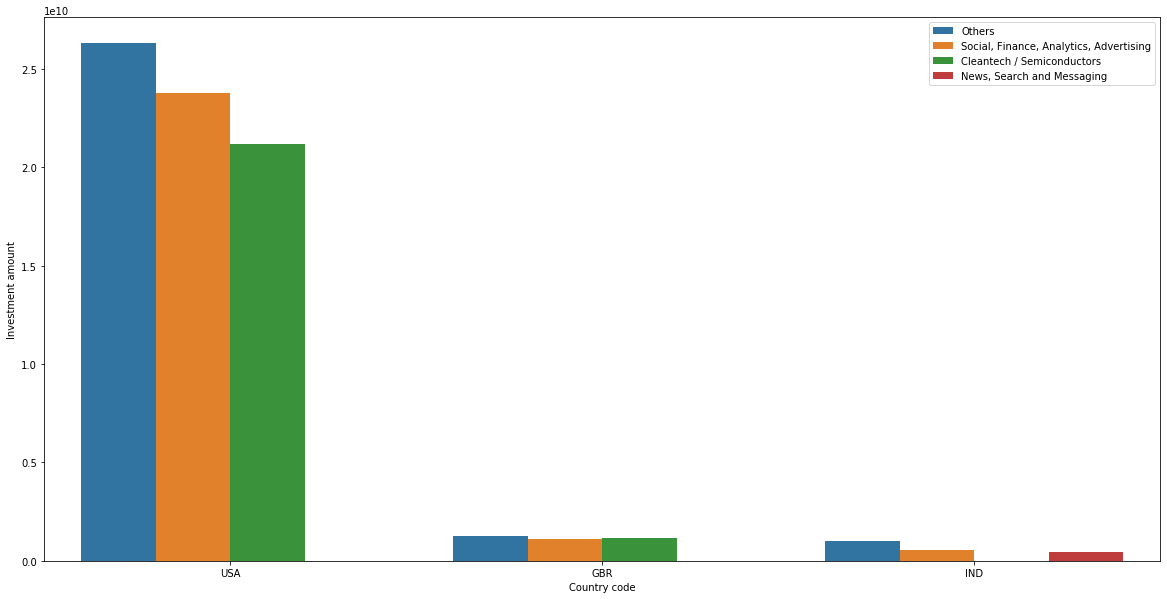

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(x="country_code", y="raised_amount_usd", hue="main_sector", data=data2)
plt.xlabel("Country code")
plt.ylabel("Investment amount")
plt.legend() 
plt.show()